In [47]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout, Activation

In [48]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(299,299)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(299,299)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [49]:
import numpy as np

In [50]:
np.array(train_ds)

array(<BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
      dtype=object)

In [51]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    #image = np.array(image)
    #label = np.array(label)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [52]:
train_ds

<MapDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [53]:
data_augmentation = keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(299,
                                  299,
                                  3))
  ]
)


In [54]:
strategy = tf.distribute.MirroredStrategy()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')


In [55]:
with strategy.scope():
    model = Sequential()
    model.add(data_augmentation)
    model.add(data_augmentation)
    #model.add(data_augmentation)
    model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(299,299,3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))
    model.add(Dropout(0.25))

    model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))
    model.add(Dropout(0.25))
    model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))
    model.add(Dropout(0.25))
    model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.fit(train_ds,epochs=7,validation_data=validation_ds)#, callbacks=[early_stop])

Epoch 1/7


2023-03-21 20:08:56.255712: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:784] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Found an unshardable source dataset: name: "TensorSliceDataset/_1"
op: "TensorSliceDataset"
input: "Placeholder/_0"
attr {
  key: "Toutput_types"
  value {
    list {
      type: DT_STRING
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: 20000
  }
}
attr {
  key: "is_files"
  value {
    b: false
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\026TensorSliceDataset:956"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
      }
    }
  }
}
attr {
  key: "replicate_on_split"
  value {
    b: false
  }
}
experimental_type {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_DATASET
    args {
      type_id: TFT_PRODUCT
      args {
        type_id: TFT_TENSOR
        args {
          type_id: TFT_STRING
        }
      }
    }
  }
}



INFO:tensorflow:batch_all_reduce: 26 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:batch_all_reduce: 26 all-reduces with algorithm = nccl, num_packs = 1


2023-03-21 20:09:01.559036: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_7/dropout_15/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


625/625 [==============================] - ETA: 0s - loss: 0.6325 - accuracy: 0.6556

2023-03-21 20:10:40.818161: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:784] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Found an unshardable source dataset: name: "TensorSliceDataset/_1"
op: "TensorSliceDataset"
input: "Placeholder/_0"
attr {
  key: "Toutput_types"
  value {
    list {
      type: DT_STRING
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: 5000
  }
}
attr {
  key: "is_files"
  value {
    b: false
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\026TensorSliceDataset:963"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
      }
    }
  }
}
attr {
  key: "replicate_on_split"
  value {
    b: false
  }
}
experimental_type {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_DATASET
    args {
      type_id: TFT_PRODUCT
      args {
        type_id: TFT_TENSOR
        args {
          type_id: TFT_STRING
        }
      }
    }
  }
}



625/625 [==============================] - 111s 166ms/step - loss: 0.6325 - accuracy: 0.6556 - val_loss: 0.5531 - val_accuracy: 0.7164
Epoch 2/7
625/625 [==============================] - 100s 160ms/step - loss: 0.5047 - accuracy: 0.7533 - val_loss: 0.4644 - val_accuracy: 0.7808
Epoch 3/7
625/625 [==============================] - 100s 160ms/step - loss: 0.4439 - accuracy: 0.7973 - val_loss: 0.5581 - val_accuracy: 0.7362
Epoch 4/7
625/625 [==============================] - 100s 160ms/step - loss: 0.3968 - accuracy: 0.8231 - val_loss: 0.4284 - val_accuracy: 0.8002
Epoch 5/7
625/625 [==============================] - 101s 161ms/step - loss: 0.3533 - accuracy: 0.8462 - val_loss: 0.5981 - val_accuracy: 0.7436
Epoch 6/7
625/625 [==============================] - 100s 160ms/step - loss: 0.3168 - accuracy: 0.8633 - val_loss: 0.4005 - val_accuracy: 0.8230
Epoch 7/7
625/625 [==============================] - 100s 160ms/step - loss: 0.2921 - accuracy: 0.8751 - val_loss: 0.2920 - val_accuracy: 0.

In [56]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [75]:
img = image.load_img('image.jpeg', target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img2 = image.load_img('1.jpg', target_size=(299, 299))
x1 = image.img_to_array(img2)
x1 = np.expand_dims(x1, axis=0)
img3 = image.load_img('2.jpg', target_size=(299, 299))
x2 = image.img_to_array(img3)
x2 = np.expand_dims(x2, axis=0)
img4 = image.load_img('3.jpeg', target_size=(299, 299))
x3 = image.img_to_array(img4)
x3 = np.expand_dims(x3, axis=0)
img5 = image.load_img('wtf.jpg', target_size=(299, 299))
x4 = image.img_to_array(img5)
x4 = np.expand_dims(x4, axis=0)

In [76]:
print(model.predict(x4))

1/1 [==============================] - 0s 89ms/step
[[1.]]


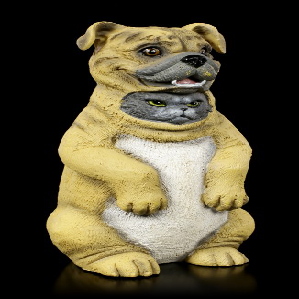

In [81]:
img5

In [74]:
model.save('cats_and_dogs')

INFO:tensorflow:Assets written to: cats_and_dogs/assets


INFO:tensorflow:Assets written to: cats_and_dogs/assets
